# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1
For every column in the data:
1. State whether the values match the description given in the table above.
2. State the number of missing values in the column.
3. Describe what you did to make values match the description if they did not
     match.


### BACKGROUND

Vivendo is a fast food chain in Brazil with over 200 outlets.

Customers often claim compensation from the company for food poisoning.

The legal team processes these claims. The legal team has offices in four locations.

The legal team wants to improve how long it takes to reply to customers and close claims.

The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('claims.csv')



**Food Claims**

In [3]:
df.head()

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
df.shape

(98, 8)

In [5]:
# Count Claim ID unique value
print("There are " + str(df['Claim ID'].nunique()) + " unique Claim ID")

There are 98 unique Claim ID


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB


In [7]:
# Converted from "R$50,000.00" to 50000 and cast data type from string to integer
df['Claim Amount'] = df['Claim Amount'].apply(lambda st: st[st.find("$")+1:st.find(".")]).str.replace(",","")

In [8]:
df['Claim Amount'] = pd.to_numeric(df['Claim Amount'])

In [9]:
df['Claim Amount'] = df['Claim Amount'].round(2)

**Converted from "R$50,000.00" to 50000 and cast data type from string to integer**

In [10]:
df.head(5)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     int64  
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [12]:
# Check for null values
df.isna().sum()

Claim ID                 0
Time to Close            0
Claim Amount             0
Amount Paid              0
Location                 0
Individuals on Claim     0
Linked Cases             0
Cause                   78
dtype: int64

In [13]:
# Replace null values in "Cause" column to "unknown"
df['Cause'] = df['Cause'].fillna('unknown')
print(df.isna().sum())

Claim ID                0
Time to Close           0
Claim Amount            0
Amount Paid             0
Location                0
Individuals on Claim    0
Linked Cases            0
Cause                   0
dtype: int64


**Replaced null values in "Cause" column with "unknown"**

In [14]:
df.head(5)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


**Claim ID** :There are 98 unique values that match the description given. There are no missing values. No changes were made to this column.

**Time to Close**: The number of days to close the claim match the description given. There are no missing values. No changes were made to this column.

**Claim Amount**: The initial claim requested in the currency of Brazil did not match the description,the currency inside "Claim Amount" column was replaced and removed from "R$50,000.00" into "50000". There are no missing values.

**Amount Paid**: Final amount paid. In the currency of Brazil, match the description given. There are no missing values. No changes were made to this column.

**Location**: There are 4 different location categories “RECIFE”, “SAO LUIS”,
“FORTALEZA”, and “NATAL” as expected.

**Individuals on Claim**: Number of individuals on this claim. Minimum 1 person, matches the description. There are no missing values. No changes were made to this column.

**Linked Cases**: All of the values in this column were either TRUE or FALSE. There were no missing values. No changes were made to this column.

**Cause**: There are 78 missing value in "Cause" column.All missing values were replaced with "unknown".


## Task 2

Create a visualization that shows the number of claims in each location. Use the
visualization to:

1. State which category of the variable location has the most observations
2. Explain whether the observations are balanced across categories of the variable location

In [15]:
# Count value in cause
print("There are " + str(df['Cause'].nunique()) + " Unique cause,")
print("________________")
print("Count 3 Main Cause of the Food Poisoning Injuries :")
print(df['Cause'].value_counts())

There are 3 Unique cause,
________________
Count 3 Main Cause of the Food Poisoning Injuries :
unknown       78
meat          12
vegetables     8
Name: Cause, dtype: int64


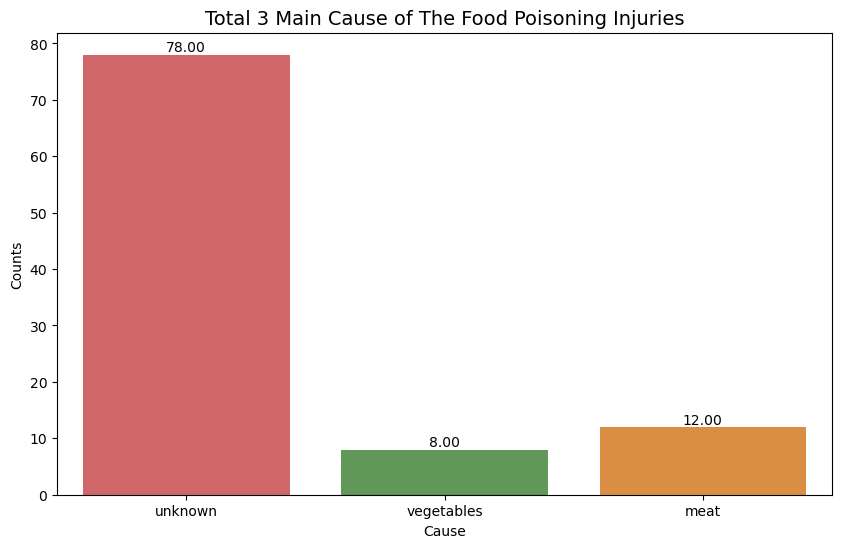

In [16]:
# Plot 3 main cause of the food poisoning injuries
plt.figure(figsize=(10,6))
color = ['#E15759','#59A14F','#F28E2B']
splot = sns.countplot(data=df,x=df['Cause'],palette=color)
plt.xlabel("Cause")
plt.ylabel("Counts")
plt.title('Total 3 Main Cause of The Food Poisoning Injuries', fontsize = 14)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

From the plot above, we can see that most of poisoning injuries is cause by unknown, after that cause by meat, and vegetables

In [17]:
# Describe df
df.describe()

,Time to Close,Claim Amount,Amount Paid,Individuals on Claim
count,98.000000,98.000000,98.000000,98.000000
mean,832.346939,122952.030612,58448.238571,4.908163
std,686.851131,166433.389040,87525.873849,7.292259
min,-57.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


In [18]:
# Explain whether the observations are balanced across categories of the variable location
print("Total Number of Individual on Claim Differ Across Location:")
print(df.groupby(['Location'])['Individuals on Claim'].sum())

Total Number of Individual on Claim Differ Across Location:
Location
FORTALEZA     69
NATAL        168
RECIFE       106
SAO LUIS     138
Name: Individuals on Claim, dtype: int64


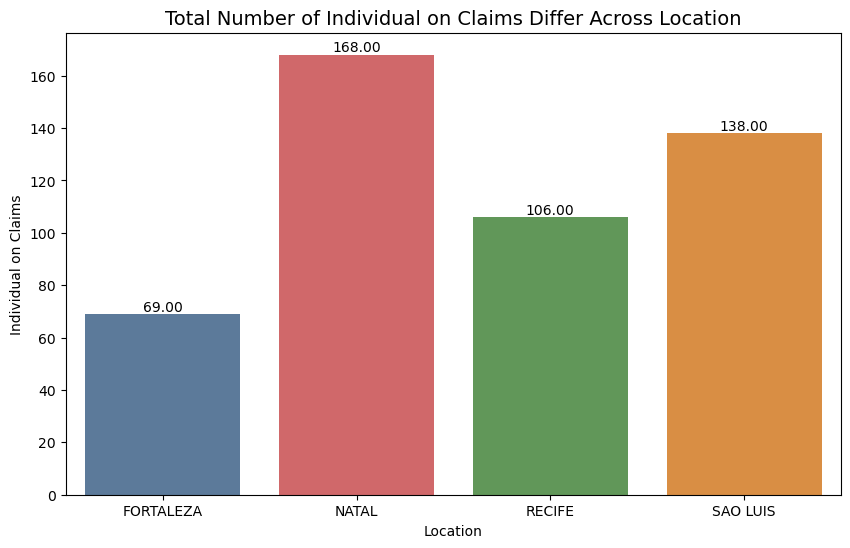

In [19]:
# Plot the number of claim differ across location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
ax = sns.barplot(x = sorted(df["Location"].unique()),
                 y = df.groupby(['Location'])['Individuals on Claim'].sum(), palette=color)
plt.xlabel("Location")
plt.ylabel("Individual on Claims")
plt.title('Total Number of Individual on Claims Differ Across Location', fontsize = 14)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

   There are four locations that the legal team processes with claims included in this data. Most claims are listed in Natal, with Sao Luis being second. The categories are unbalanced, with most observations being either Natal or Sao Luis. This would suggest that the legal team should focus on distributing their members to handle claims in place with most claims, then Vivendo fast food company should consider why there are lots of claims in Sao Luis.

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

As the legal team thinks that the time to close the claims at a location will be important, we should look at how the time to close claims is distributed.

Even though Natal has the most claims, Natal has the least average time to close claims compared with other locations. We can see from the graphic below that Sao Luis has the highest average time to close claims, then less in Recife, Fortaleza, and Natal. This would suggest that the legal team in Natal must have worked efficiently so that they could press the average time to close claims. The legal team should focus on making the average time lower in certain Locations such as Sao Luis and Fortaleza. Even though Fortaleza has the lowest claims, the average time to close claims is slightly high.

There are various time to close between one claim and another. The most common time, it tooks around 0-500 days from someone make a claim until the claim has solved. The distribution of time to close claims is shown as follows using histograph.

In [20]:
# The average time to close claims differ by location?
print("Average time to close claims differ by location: ")
print(df.groupby('Location')['Time to Close'].mean())


Average time to close claims differ by location: 
Location
FORTALEZA     775.500000
NATAL         581.142857
RECIFE        860.680000
SAO LUIS     1026.266667
Name: Time to Close, dtype: float64


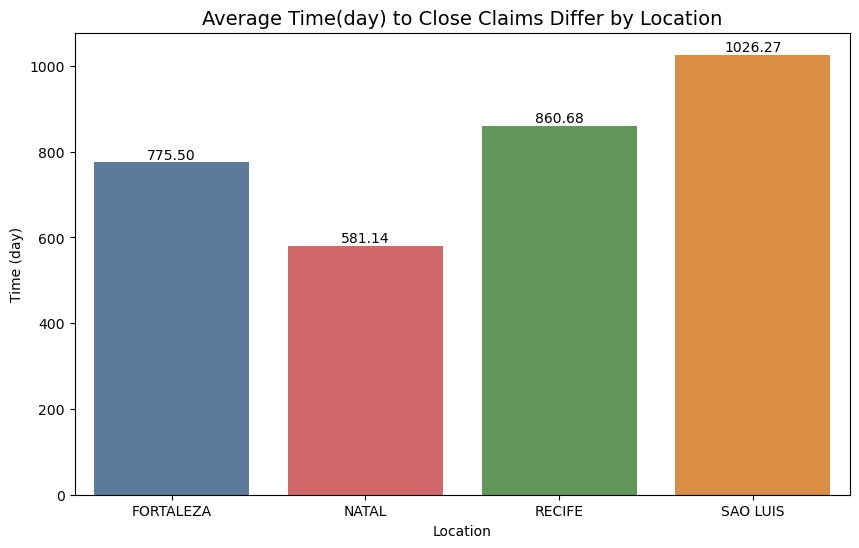

In [21]:
# Plot the the average time to close claims differ by location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
bx = sns.barplot(x = sorted(df["Location"].unique()),
                 y = df.groupby('Location')['Time to Close'].mean(),palette=color)
plt.xlabel("Location")
plt.ylabel("Time (day)")
plt.title('Average Time(day) to Close Claims Differ by Location', fontsize = 14)
for p in bx.patches:
  bx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

In [22]:
# What is the distribution of time to close claims?
print(df['Time to Close'].value_counts())

120     3
2082    1
662     1
473     1
479     1
       ..
1177    1
1164    1
1169    1
1178    1
195     1
Name: Time to Close, Length: 96, dtype: int64


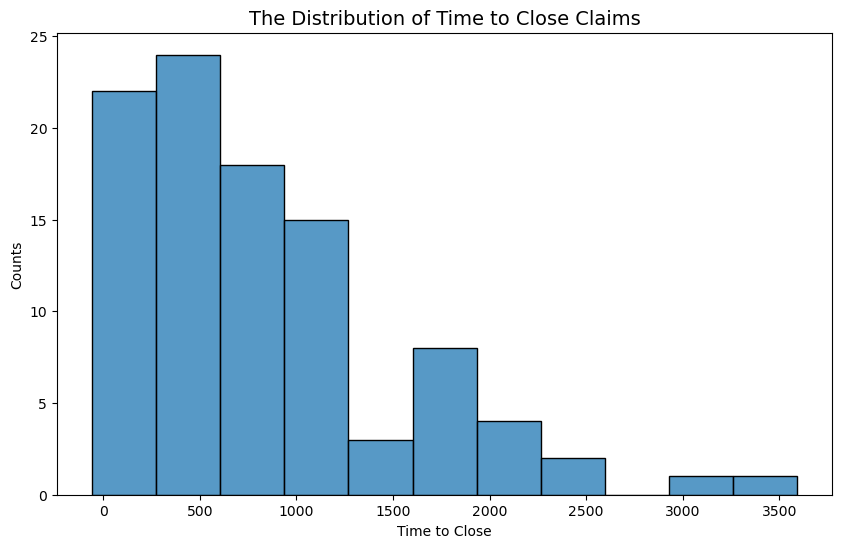

In [23]:
# Plot the distribution of time to close claims
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Time to Close")
plt.xlabel("Time to Close")
plt.ylabel("Counts")
plt.title('The Distribution of Time to Close Claims', fontsize = 14)
plt.show()

## Task 4

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

Following graph is the spread of time to close claims differ by location, Sao Luis has wide range and variance of time to close claims.
Based on all of the below graphics, we would recommend that the legal team should focus on certain location that have highest individual claims, and increasing the effectivity while examine the claims to reduce the time to close within claim. The fast food company should also consider why that there was a highly individual claims in certain location

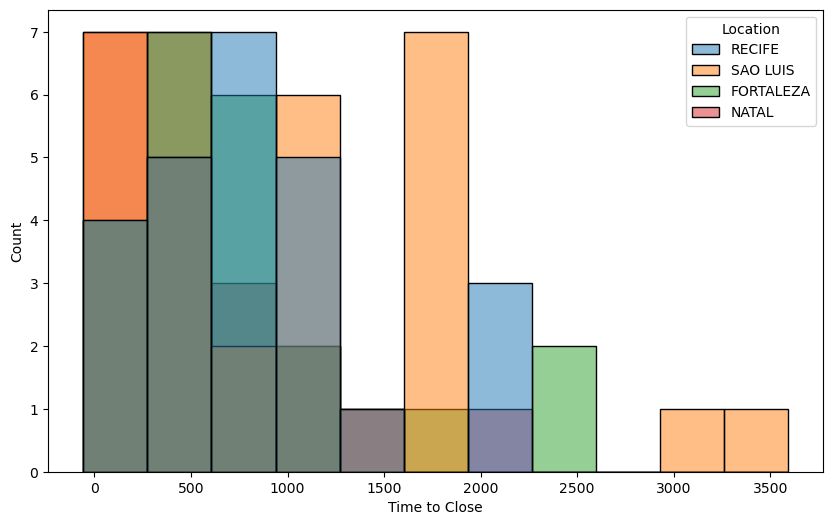

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Time to Close", hue="Location")
plt.show()

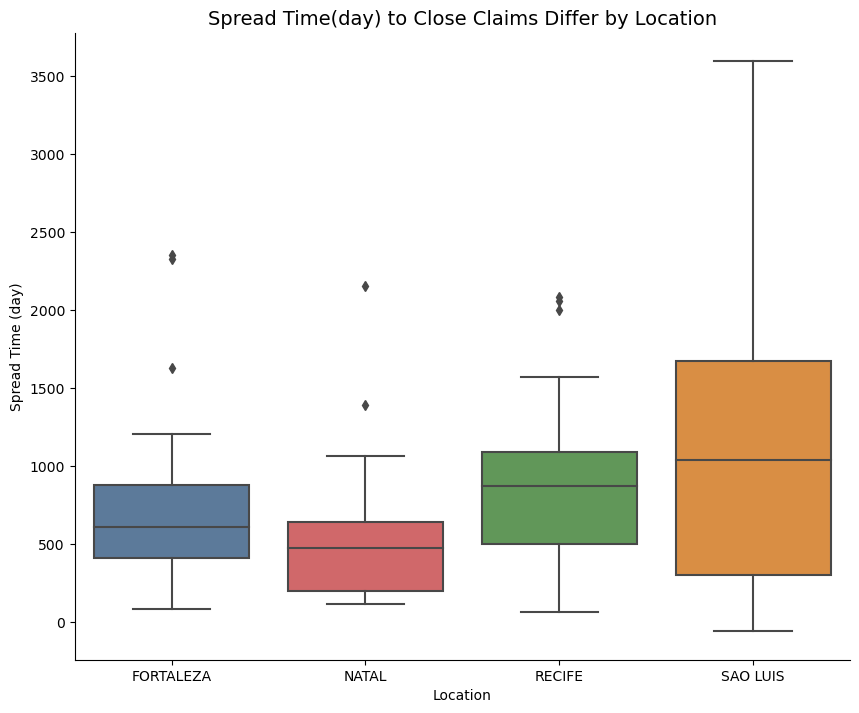

In [25]:
# Plot the time to close claims differ by location
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
cx = sns.catplot(x="Location", y='Time to Close', kind="box", data = df, order = sorted(df["Location"].unique()), palette=color, height=7, aspect=8.7/7)
plt.xlabel("Location")
plt.ylabel("Spread Time (day)")
plt.title('Spread Time(day) to Close Claims Differ by Location', fontsize = 14)
plt.show()

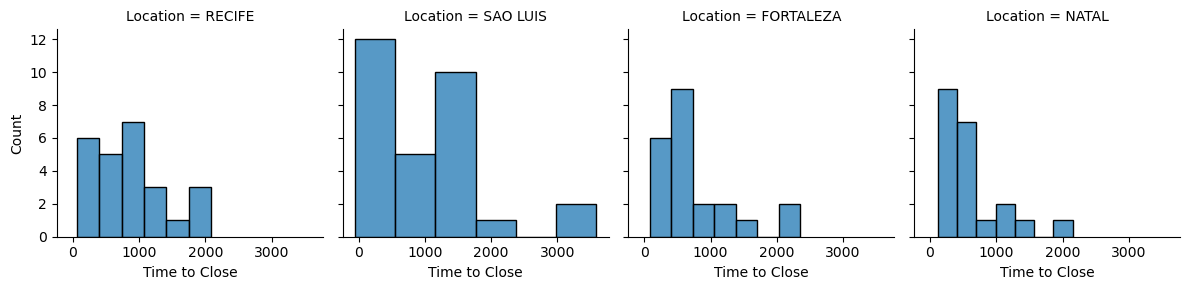

In [26]:
g = sns.FacetGrid(df, col="Location")
g.map_dataframe(sns.histplot, x="Time to Close")

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam